In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

data = pd.read_csv("train.csv")

# Pipeline for data preproccessing

### XGBClassifier is used for evaluation

In [504]:
np.random.seed(46)

data = data[['Survived','Age','Fare','Embarked','Sex','Pclass']]
gbm = XGBClassifier()

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', gbm)])

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.849


In [505]:
chunk = data[['Age','Fare','Embarked','Sex','Pclass']]
preprocessor.fit(chunk)
chunk = pd.DataFrame(data = preprocessor.transform(chunk), columns = ['Age','Fare','Embarked_C','Embarked_S','Embarked_Q','&&&','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3'])
chunk["Survived"] = data['Survived']
chunk = chunk[['Survived','Age','Fare','Embarked_C','Embarked_S','Embarked_Q','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3']]

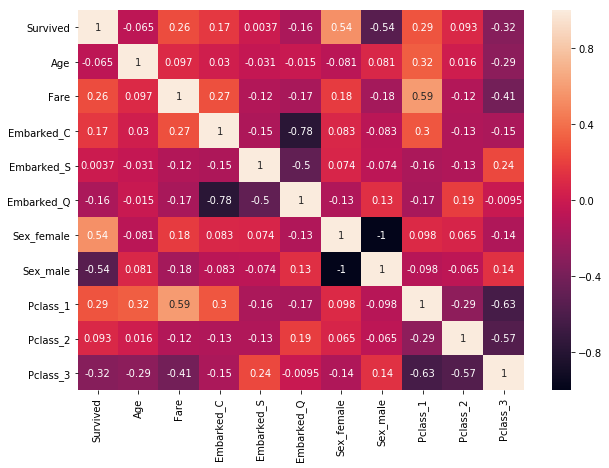

In [506]:
plt.figure(figsize = (10,7))
sns.heatmap(data = chunk.corr(),annot = True)

### GridsearchCV for best parameters

In [500]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__min_child_weight': [1.0,1.2,1.5,2.0],
    'classifier__max_depth': [3,6,8],
    'classifier__n_estimators': [100,500],
}

grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False,verbose=1)
grid_search.fit(X_train, y_train)

print(("best XGBClassifier result from grid search: %.3f"
       % grid_search.score(X_test, y_test)))



Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best XGBClassifier result from grid search: 0.855


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.7min finished


{'classifier__max_depth': 3,
 'classifier__min_child_weight': 1.2,
 'classifier__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [514]:
print('Train score: %.3f'%clf.score(X_train,y_train))
print('Test score: %.3f'%clf.score(X_test,y_test))

Train score: 0.850
Test score: 0.844


# Test evaulation

In [469]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [517]:
X = data_test
preds = clf.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [530]:
Predictions = pd.DataFrame(data = data_test[['PassengerId']])
Predictions['Survived'] = preds
Predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [532]:
Predictions.to_csv('Titanic_preds.csv',sep = ",", index = False)